# Decision Tree

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

### Import data

In [2]:
X_train_s = np.load('data/X_train_s.npy')
X_test_s = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

feature_names = np.load('data/feature_names.npy')

### Parameter Optimization

In [3]:
def calc_params(X, y, clf, param_values, param_name, K, verbose=False):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        
        if (verbose):
            s = "{} {:.3f} train {:.3f} test {:.3f}"
            print(s.format(param_name, param_value, train_scores[i], test_scores[i]))
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")
    plt.grid(True)

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

### max_depth

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

max_depth 1.000 train 0.787 test 0.787
max_depth 2.000 train 0.860 test 0.860
max_depth 3.000 train 0.884 test 0.884
max_depth 4.000 train 0.888 test 0.888
max_depth 5.000 train 0.904 test 0.904
max_depth 6.000 train 0.919 test 0.918
max_depth 7.000 train 0.930 test 0.929
max_depth 8.000 train 0.938 test 0.935
max_depth 9.000 train 0.945 test 0.941
max_depth 10.000 train 0.951 test 0.945
max_depth 11.000 train 0.956 test 0.949
max_depth 12.000 train 0.962 test 0.950
max_depth 13.000 train 0.967 test 0.952
max_depth 14.000 train 0.971 test 0.952
max_depth 15.000 train 0.975 test 0.951
max_depth 16.000 train 0.979 test 0.951
max_depth 17.000 train 0.983 test 0.950
max_depth 18.000 train 0.986 test 0.950
max_depth 19.000 train 0.989 test 0.950
max_depth 20.000 train 0.991 test 0.948
max_depth 21.000 train 0.993 test 0.947
max_depth 22.000 train 0.994 test 0.947
max_depth 23.000 train 0.996 test 0.947
max_depth 24.000 train 0.997 test 0.947
max_depth 25.000 train 0.998 test 0.947
max_depth

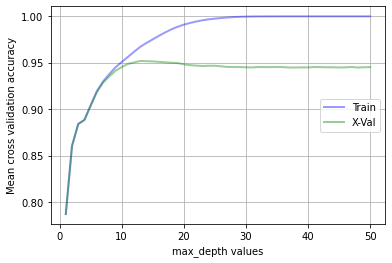

In [5]:
dt = tree.DecisionTreeClassifier()

param_range = range(1,51)

train_scores, test_scores = calc_params(X_train_s, y_train, dt, param_range, 'max_depth', 3, True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

The optimal value for max_depth is 13, but for the purposes of GridSearch a sensible range would be 10 to 20. Limiting the max depth can help to prevent the model from overfitting. The graph shows that going beyond max depth of 13 does not increase predictive power, but only the training score. 

### min_samples_split

The minimum number of samples required to split an internal node:
* If int, then consider min_samples_split as the minimum number.
* If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


min_samples_split 2.000 train 1.000 test 0.945
min_samples_split 3.000 train 0.998 test 0.946
min_samples_split 4.000 train 0.995 test 0.946
min_samples_split 5.000 train 0.993 test 0.947
min_samples_split 6.000 train 0.991 test 0.947
min_samples_split 7.000 train 0.989 test 0.947
min_samples_split 8.000 train 0.987 test 0.948
min_samples_split 9.000 train 0.986 test 0.948
min_samples_split 10.000 train 0.984 test 0.948
min_samples_split 11.000 train 0.983 test 0.949
min_samples_split 12.000 train 0.982 test 0.949
min_samples_split 13.000 train 0.981 test 0.949
min_samples_split 14.000 train 0.980 test 0.950
min_samples_split 15.000 train 0.979 test 0.950
min_samples_split 16.000 train 0.978 test 0.951
min_samples_split 17.000 train 0.977 test 0.951
min_samples_split 18.000 train 0.977 test 0.951
min_samples_split 19.000 train 0.976 test 0.951
min_samples_split 20.000 train 0.975 test 0.951
min_samples_split 21.000 train 0.975 test 0.951
min_samples_split 22.000 train 0.974 test 0.952


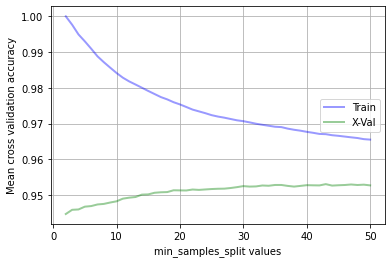

In [6]:
dt = tree.DecisionTreeClassifier()

param_range = range(2,51)

train_scores, test_scores = calc_params(X_train_s, y_train, dt, param_range, 'min_samples_split', 3, True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

The optimal min samples split parameter value is 43. For the purposes of GridSearch we will explore 35 to 45 range. Optimizing for min samples split helps with improving accuracy and preventing overfitting. As min samples split increases train accuracy comes down closer to test accuracy lessening overfitting.

### min_samples_leaf

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* If int, then consider min_samples_leaf as the minimum number.
* If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.


min_samples_leaf 1.000 train 1.000 test 0.945
min_samples_leaf 2.000 train 0.990 test 0.947
min_samples_leaf 3.000 train 0.985 test 0.949
min_samples_leaf 4.000 train 0.980 test 0.949
min_samples_leaf 5.000 train 0.977 test 0.949
min_samples_leaf 6.000 train 0.974 test 0.950
min_samples_leaf 7.000 train 0.972 test 0.950
min_samples_leaf 8.000 train 0.971 test 0.950
min_samples_leaf 9.000 train 0.969 test 0.951
min_samples_leaf 10.000 train 0.968 test 0.951
min_samples_leaf 11.000 train 0.967 test 0.950
min_samples_leaf 12.000 train 0.966 test 0.950
min_samples_leaf 13.000 train 0.965 test 0.950
min_samples_leaf 14.000 train 0.964 test 0.951
min_samples_leaf 15.000 train 0.963 test 0.951
min_samples_leaf 16.000 train 0.962 test 0.951
min_samples_leaf 17.000 train 0.962 test 0.951
min_samples_leaf 18.000 train 0.961 test 0.950
min_samples_leaf 19.000 train 0.960 test 0.950
min_samples_leaf 20.000 train 0.960 test 0.950
min_samples_leaf 21.000 train 0.959 test 0.950
min_samples_leaf 22.00

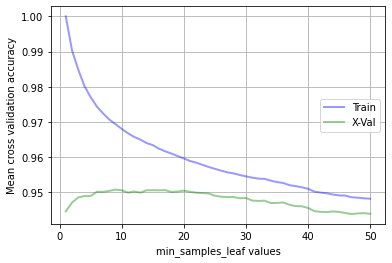

In [8]:
dt = tree.DecisionTreeClassifier()

param_range = range(1,51)

train_scores, test_scores = calc_params(X_train_s, y_train, dt, param_range, 'min_samples_leaf', 3, True)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

The optimal min samples leaf value is 9. We will use 5 to 15 for the GridSearch. Limiting min samples leaf substantially decreases overfitting. Especially for the first 10 values.

### max_leaf_nodes

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

CPU times: user 8min 21s, sys: 8.52 s, total: 8min 29s
Wall time: 8min 35s

Best Score 0.957 for parameter value 350


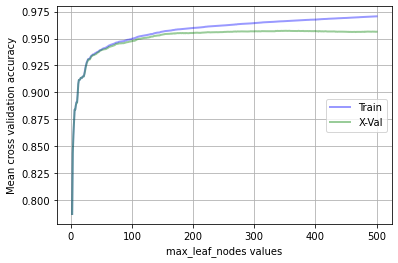

In [16]:
dt = tree.DecisionTreeClassifier()

param_range = range(2,501)

%time train_scores, test_scores = calc_params(X_train_s, y_train, dt, param_range, 'max_leaf_nodes', 3, False)

max_at = np.where(test_scores==np.max(test_scores))[0][0]
print("\nBest Score {:.3f} for parameter value".format(test_scores[max_at]), [*param_range][max_at])

The optimal value for max leaf nodes parameter is 350. The range of 340 to 360 will be used for GridSearch optimization purposes. As with all other parameters limiting this number helps with overfitting.

In [19]:
dt = tree.DecisionTreeClassifier()

# parameter values to be optimized for
parameters = {
    'max_depth': [*range(10, 21)],
    'min_samples_split' : [*range(35, 46)],
    'min_samples_leaf' : [*range(5, 16)],
    'max_leaf_nodes' : [*range(340, 361)],
    'class_weight' : [None, 'balanced'],
    'criterion': ['entropy', 'gini']
}

# GridSearch finds the best combination of paramters
#tree_gs = GridSearchCV(dt, parameters, verbose=3, cv=3, scoring='accuracy', n_jobs=-1, return_train_score=False)
tree_gs = RandomizedSearchCV(dt, parameters, verbose=3, cv=3, n_iter=5000, scoring='accuracy', n_jobs=7, return_train_score=False)

In [20]:
%time tree_gs.fit(X_train_s, y_train) # performs gridsearch
print(tree_gs.best_params_)
print("RMSE (test): {:.4f}".format(tree_gs.best_score_))

Fitting 3 folds for each of 5000 candidates, totalling 15000 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:    3.3s
[Parallel(n_jobs=7)]: Done 114 tasks      | elapsed:   12.4s
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed:   29.6s
[Parallel(n_jobs=7)]: Done 498 tasks      | elapsed:   54.0s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 1138 tasks      | elapsed:  2.1min
[Parallel(n_jobs=7)]: Done 1554 tasks      | elapsed:  2.9min
[Parallel(n_jobs=7)]: Done 2034 tasks      | elapsed:  4.1min
[Parallel(n_jobs=7)]: Done 2578 tasks      | elapsed:  5.9min
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:  7.8min
[Parallel(n_jobs=7)]: Done 3858 tasks      | elapsed:  9.6min
[Parallel(n_jobs=7)]: Done 4594 tasks      | elapsed: 11.6min
[Parallel(n_jobs=7)]: Done 5394 tasks      | elapsed: 14.1min
[Parallel(n_jobs=7)]: Done 6258 tasks      | elapsed: 16.9min
[Parallel(n_jobs=7)]: Done 7186 tasks      | elapsed: 19.6min


CPU times: user 51.5 s, sys: 12.7 s, total: 1min 4s
Wall time: 39min 12s
{'min_samples_split': 35, 'min_samples_leaf': 5, 'max_leaf_nodes': 356, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None}
RMSE (test): 0.9557


### Best Parameters

In [23]:
print(tree_gs.best_params_)

{'min_samples_split': 35, 'min_samples_leaf': 5, 'max_leaf_nodes': 356, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None}


In [38]:
dt = tree.DecisionTreeClassifier(min_samples_split=35, 
                                 min_samples_leaf=5, 
                                 max_leaf_nodes=356, 
                                 max_depth=20, 
                                 criterion='entropy', 
                                 class_weight=None)

fit = dt.fit(X_train_s, y_train)
train_eval_score = dt.score(X_train_s, y_train)
test_eval_score = dt.score(X_test_s, y_test)
predicted = fit.predict(X_test_s)

print("Evaluation scores Train {:.3f} Test {:.3f}".format(train_eval_score, test_eval_score))

Evaluation scores Train 0.963 Test 0.950


In [42]:
def fit_predict_score(y_test, predicted):
    """Predicts the average accuracy score of a classifier clf and outputs a confusion matrix."""
    
    #cross tabulation of predicted and actual values produces the correlation matrix
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),4)
    plt.title("Confusion Matrix", fontsize = 12)
    plt.show()
    print("Accuracy Score: ",accuracy)
    print (metrics.classification_report(y_test,predicted))

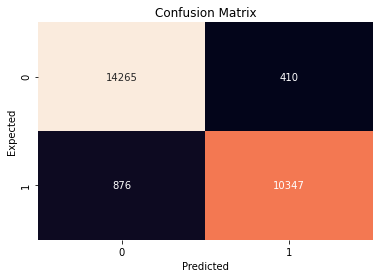

Accuracy Score:  0.9503
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14675
           1       0.96      0.92      0.94     11223

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



In [43]:
fit_predict_score(y_test, predicted)

The accuracy score is excellent (95%). The precision and Recall scores are also balanced and fairly high.

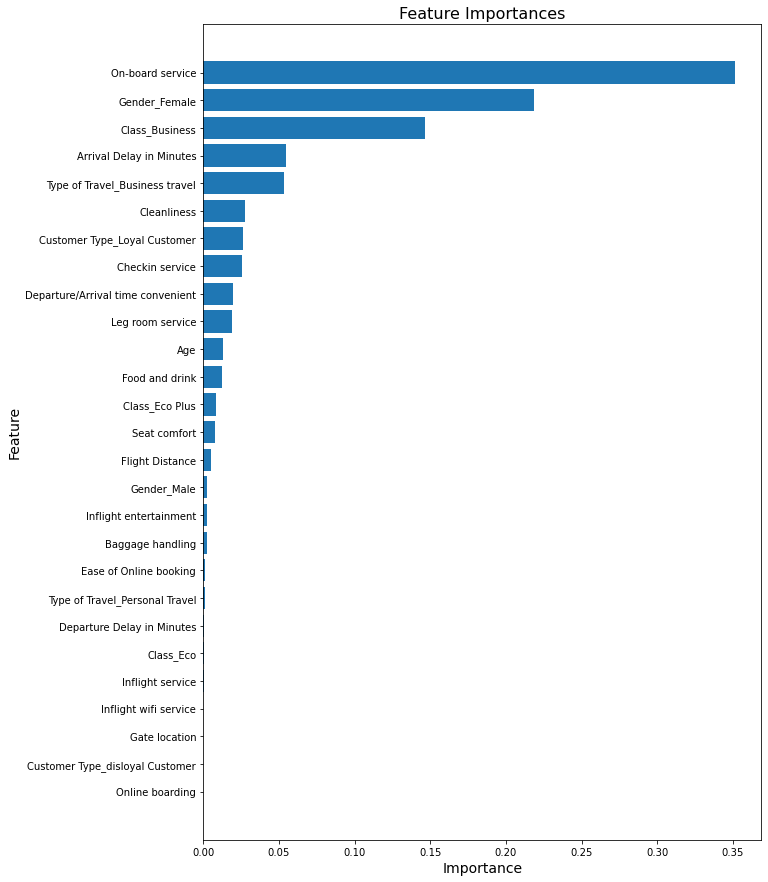

In [33]:
p = dt.feature_importances_.argsort()

plt.figure(figsize=(10,15));
plt.barh(feature_names[p], dt.feature_importances_[p]);
plt.title("Feature Importances", size=16);
plt.xlabel("Importance", size=14);
plt.ylabel("Feature", size=14);
plt.show();

The decision tree implied that On-board service, Gender_Female, and Class_Business were three most important features in this dataset. While the last 12 features from the bottom had no little to no influence.